<a href="https://colab.research.google.com/github/k4ilham/collab/blob/main/AnalisisSentimenCapres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Translate

##Load csv

load data terjemahan

In [31]:
import pandas as pd

# URL CSV yang sudah diubah menjadi raw.githubusercontent.com
url = 'https://raw.githubusercontent.com/k4ilham/Sentimen-Analisis-TFIDF-dan-KNN/main/archive/translate.csv'

# Membaca file CSV dari URL
data = pd.read_csv(url, encoding='latin1')

In [32]:
data.head()

,text,text_english
0,sok kali,too much
1,meski di juara empatkalian tetap juara satu in...,"Even though you are fourth place, you are stil..."
2,pak bawa main timnas bal pak suruh latih passi...,"Sir told me to play for the national team, Sir..."
3,ada 1 lwn squad chetahh,there is 1 against the chetahh squad
4,apo nan assalamualaikum lah kalah alah,apo nan assalamualaikum lah lost alah


In [33]:
print(data.columns)

Index(['text', 'text_english'], dtype='object')


#TextBlob Classifier

In [34]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [35]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

##Labeling

In [36]:
data

,text,text_english
0,sok kali,too much
1,meski di juara empatkalian tetap juara satu in...,"Even though you are fourth place, you are stil..."
2,pak bawa main timnas bal pak suruh latih passi...,"Sir told me to play for the national team, Sir..."
3,ada 1 lwn squad chetahh,there is 1 against the chetahh squad
4,apo nan assalamualaikum lah kalah alah,apo nan assalamualaikum lah lost alah
...,...,...
515,otw olimpiade,otw Olympics
516,waalaikumsalam sidang jumat bahagia,waalaikumsalam happy Friday session
517,alhamdulillah sia nobar jelang subuh rela jala...,"Thank God, Si Nobar, before dawn, was willing ..."
518,muannnnnntep budakssss,muannnnnntstay slavesss


In [37]:
data_tweet = list(data['text_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
  analysis = TextBlob(tweet)
  polaritas += analysis.polarity

  if analysis.sentiment.polarity >0.0:
    total_positif += 1
    status.append('Positif')
  elif analysis.sentiment.polarity == 0.0:
    total_netral += 1
    status.append('Netral')
  else:
    total_negatif += 1
    status.append('Negatif')

  total += 1




In [38]:
print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 191
Netral = 300
Negatif = 29

Total Data : 520


In [39]:
data['klasifikasi'] = status
data

,text,text_english,klasifikasi
0,sok kali,too much,Positif
1,meski di juara empatkalian tetap juara satu in...,"Even though you are fourth place, you are stil...",Positif
2,pak bawa main timnas bal pak suruh latih passi...,"Sir told me to play for the national team, Sir...",Negatif
3,ada 1 lwn squad chetahh,there is 1 against the chetahh squad,Netral
4,apo nan assalamualaikum lah kalah alah,apo nan assalamualaikum lah lost alah,Netral
...,...,...,...
515,otw olimpiade,otw Olympics,Netral
516,waalaikumsalam sidang jumat bahagia,waalaikumsalam happy Friday session,Positif
517,alhamdulillah sia nobar jelang subuh rela jala...,"Thank God, Si Nobar, before dawn, was willing ...",Positif
518,muannnnnntep budakssss,muannnnnntstay slavesss,Netral


##Visualisation

###Word Cloud

In [40]:
print(data.columns)

Index(['text', 'text_english', 'klasifikasi'], dtype='object')


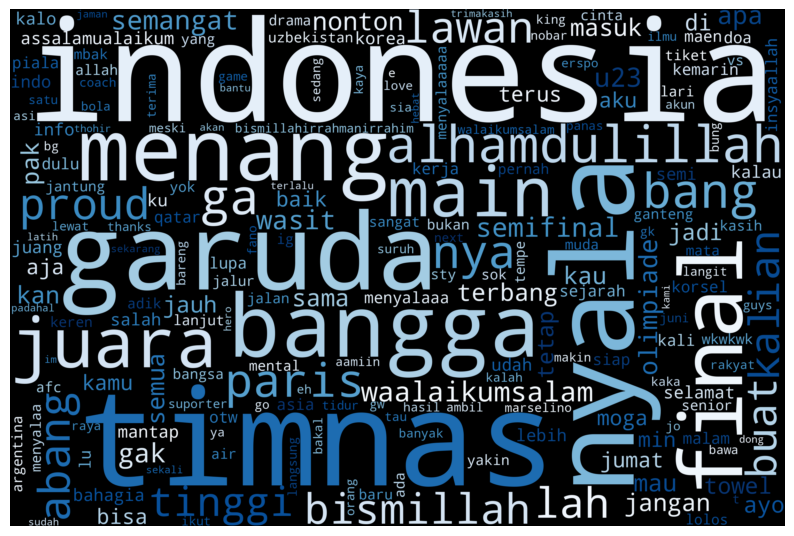

In [41]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
  plt.figure(figsize=(10,8))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

all_words = ' '.join([tweets for tweets in data['text']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap="Blues_r",
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

###Sentimen Ditribution Chart

In [42]:
import seaborn as sns

sns.set_theme()

labels = ['Positif','Negatif','Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
  fig, ax = plt.subplots(figsize=(8,6))
  bars = ax.bar(labels, counts, color=['#239947','#f72323','#fac343'])

  for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0,3),
                textcoords="offset points",
                ha='center', va='bottom')

  ax.grid(axis='y', linestyle='--', alpha=0.7)
  ax.set_xlabel=('Sentimen')
  ax.set_ylabel=('Count')
  ax.set_title(title)

  plt.show()

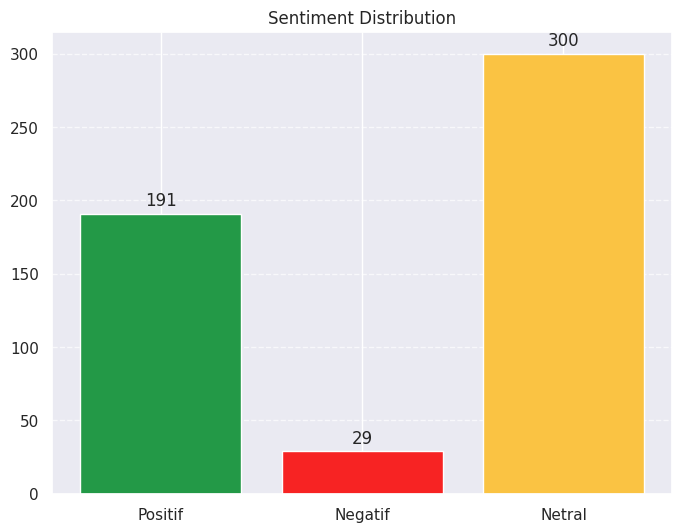

In [43]:
show_bar_chart(labels, counts,"Sentiment Distribution")

#Klasifikasi KNN

In [44]:
import pandas as pd
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data = data[['text','klasifikasi']]
# Konversi dataset ke dalam DataFrame pandas
df = pd.DataFrame(data)

# Memisahkan dataset berdasarkan klasifikasi
set_positif = df[df['klasifikasi'] == 'Positif']['text'].tolist()
set_negatif = df[df['klasifikasi'] == 'Negatif']['text'].tolist()
set_netral = df[df['klasifikasi'] == 'Netral']['text'].tolist()

# Mengambil sample setengah dari setiap kategori
set_positif = random.sample(set_positif, k=int(len(set_positif)/2)) if len(set_positif) > 1 else set_positif
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2)) if len(set_negatif) > 1 else set_negatif
set_netral = random.sample(set_netral, k=int(len(set_netral)/2)) if len(set_netral) > 1 else set_netral

# Membuat train set
train_texts = set_positif + set_negatif + set_netral
train_labels = ['Positif'] * len(set_positif) + ['Negatif'] * len(set_negatif) + ['Netral'] * len(set_netral)

# Vectorisasi teks menggunakan TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_texts)
y_train = train_labels

# Split dataset menjadi data training dan testing
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Inisialisasi dan pelatihan model KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_split, y_train_split)

# Evaluasi model
y_pred = knn.predict(X_test_split)
accuracy = accuracy_score(y_test_split, y_pred)
print("Akurasi Test: ", accuracy)


Akurasi Test:  0.5769230769230769
